In [1]:
from os import chdir, listdir
from warnings import simplefilter
from xarray import open_dataset
simplefilter("ignore")

In [2]:
chdir('/home/zhangc/WPS/output_metgrid/')

In [3]:
listdir()

['met_em.d01.2010-01-01_00:00:00.nc',
 'met_em.d01.2010-01-01_06:00:00.nc',
 'met_em.d01.2010-01-01_12:00:00.nc',
 'met_em.d01.2010-01-01_18:00:00.nc',
 'met_em.d01.2010-01-02_00:00:00.nc']

In [4]:
nc = 'met_em.d01.2010-01-01_00:00:00.nc'

In [5]:
ds = open_dataset(nc)

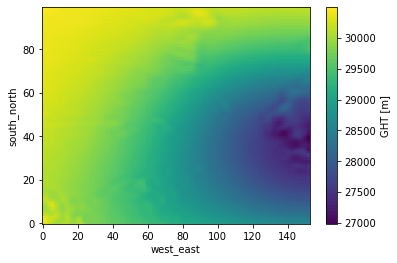

In [11]:
ds.GHT[0][-1].plot()